In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
regresion = linear_model.LinearRegression()

In [39]:
datos = pd.read_csv("/Data Science/Datasets/movie_metadata.csv")

In [40]:
datos.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [89]:
df = pd.DataFrame(datos)
df = df[df.movie_facebook_likes > 0]

In [90]:
x = df['movie_facebook_likes']
y = df['imdb_score']

In [91]:
X = x[:, np.newaxis]
print(X)

[[ 33000]
 [ 85000]
 [164000]
 ...
 [    16]
 [   660]
 [   456]]


In [92]:
print(regresion.fit(X, y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [93]:
print(regresion.coef_)

[1.72354705e-05]


In [94]:
m = regresion.coef_[0]

In [95]:
b = regresion.intercept_
y_p = m*X+b

In [96]:
print('y={0}*x+{1}'.format(m, b))

y=1.723547053518009e-05*x+6.171158148290266


In [97]:
print(regresion.predict(X)[0:5])

[6.73992868 7.63617314 8.99777532 6.58480944 6.67098679]


In [98]:
print("El valor de r cuadrado: ", r2_score(y, y_p))

El valor de r cuadrado:  0.11689276664584858


Text(0, 0.5, 'Score imdb')

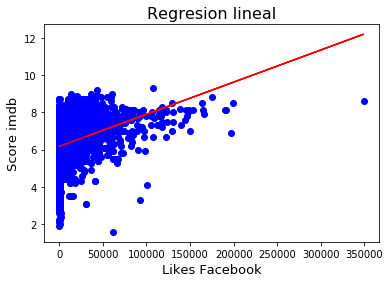

In [99]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, y_p, color = 'red')
plt.title('Regresion lineal', fontsize = 16)
plt.xlabel('Likes Facebook', fontsize = 13)
plt.ylabel('Score imdb', fontsize = 13)